In [1]:
#Importing all necessary libraries to proceed with this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load and read data
df_store = pd.read_csv("C:/Users/Admin/Desktop/Final Project/stores_data_set.csv")
df_feature = pd.read_csv("C:/Users/Admin/Desktop/Final Project/Features_data_set.csv",parse_dates=["Date"], dayfirst=True)
df_sale = pd.read_csv("C:/Users/Admin/Desktop/Final Project/sales_data_set.csv",parse_dates=["Date"],dayfirst=True)


**Glimpse into Data Analysis**

*Lets see how the table look and get some basic information ie*
* Data Types
* No of Data(rows and columns)
* Null Data
* few rows to understand the data

In [3]:
#Checking stores Data
print(df_store.info())
print(df_store.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [4]:
#Checking Sales Data
print(df_sale.info())
print(df_sale.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
None
   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False


In [6]:
#Checking features Data
print(df_feature.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB
None


In [7]:
df_feature.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


*Upon analyzing the data, it is evident that a logical categorization of the information can be based on time, store, and department. Additionally, considering the influence of external factors such as holidays, temperature, fuel prices, Consumer Price Index (CPI), unemployment rate, and the type of store on sales is crucial for a comprehensive understanding.*

**Examination based on Dates:**

*let explore data based on the timeline*

* lets Merge Feature tables and sales tables based on the date

* we will convert WeeklySales in Millions

* we will modify column as the day is holiday or not 

In [8]:
print(df_feature.columns)
print(df_sale.columns)
print(df_store.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
Index(['Store', 'Type', 'Size'], dtype='object')


In [12]:
# Grouping feature data in date column
data_date = df_feature.groupby('Date').agg({'Temperature': 'mean','Fuel_Price': 'mean','IsHoliday':'sum', 'CPI': 'mean', 'Unemployment': 'mean'})
data_date = data_date.sort_index()
temp_date_data = data_date[:'26-10-2012']

# Grouping sales data in date column
data_sales_date = df_sale.groupby('Date').agg({'Weekly_Sales': 'sum'})
data_sales_date.sort_index(inplace=True)
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)
data = pd.merge(data_sales_date, temp_date_data, left_index=True, right_index=True, how='left')
data['IsHoliday'] = data['IsHoliday'].apply(lambda x: True if x == 45.0 else False)

In [13]:
# checking merge data
data.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,143.000000,143.000000,143.000000,143.000000,143.000000
mean,46.601399,60.663782,3.358607,171.578394,7.999151
std,5.399713,15.172792,0.429401,3.100148,0.483853
min,39.000000,30.480889,2.672067,167.546485,6.953711
25%,44.000000,47.720222,2.885367,168.408144,7.508333
50%,46.000000,61.051111,3.488644,171.386189,8.150133
75%,47.000000,74.697333,3.726133,174.724576,8.428578
max,80.000000,82.176444,3.997778,176.652613,8.619311


<Axes: title={'center': 'Unemployment'}, xlabel='Date'>

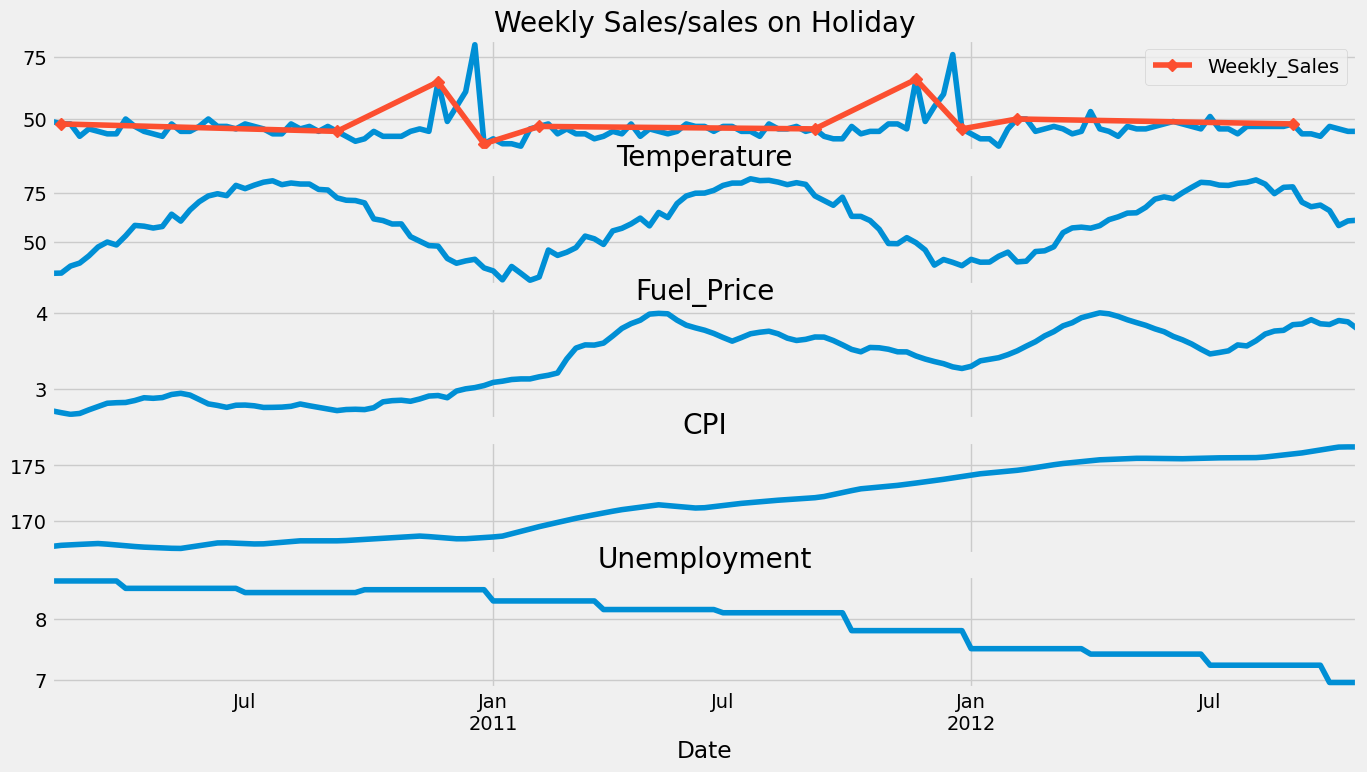

In [14]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(5,1,figsize=(15,8),sharex=True) 
data["Weekly_Sales"].plot(ax=ax[0],title="Weekly Sales/sales on Holiday")
data[data.IsHoliday==True]["Weekly_Sales"].plot(marker="D",ax=ax[0],legend="Holiday Week sale")
data["Temperature"].plot(ax=ax[1], title="Temperature")
data["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
data["CPI"].plot(ax=ax[3],title="CPI")
data["Unemployment"].plot(ax=ax[4],title="Unemployment")



<Axes: >

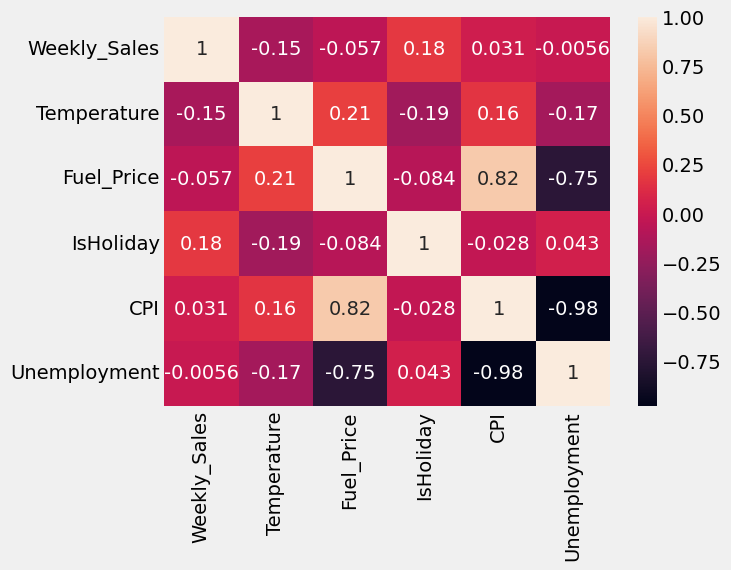

In [15]:
sns.heatmap(data.corr(),annot=True)

*In Summary*
* Weekly sales doesnot show any high correlation with any other parameters.
* CPI and Unemployment shows negative correlation on other hand Fuel Price show positive correlation
* Unemployment and Fuel price are also negatively correlated

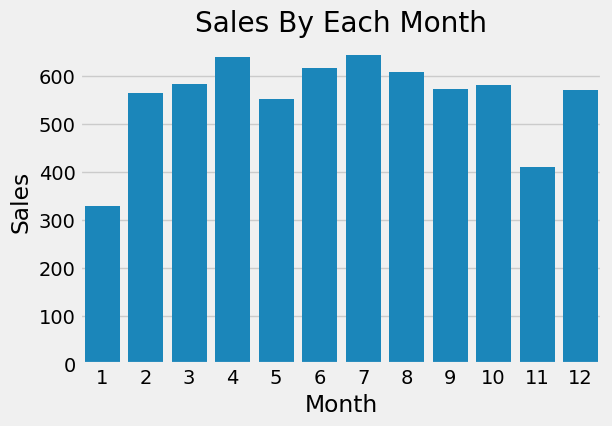

In [16]:
data_sales_month = data.groupby(data.index.month).agg({'Weekly_Sales': 'sum'})
plt.figure(figsize=(6,4))
sns.barplot(x = data_sales_month.index, y = data_sales_month.Weekly_Sales)
plt.title('Sales By Each Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In summary 

* Sales tend to rise significantly during special offers and holidays (e.g., Black Friday, Christmas, New Year), followed by a decline. Subsequently, sales regain momentum in certain months.

* November indicates reduced buying, possibly due to anticipation of upcoming sales.



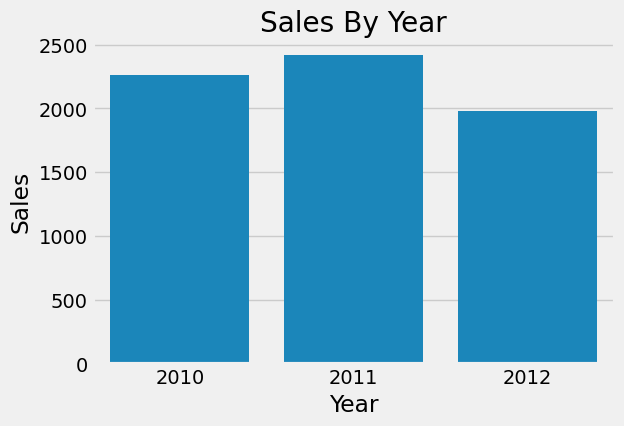

In [17]:
data_sales_year = data.groupby(data.index.year).agg({'Weekly_Sales': 'sum'})
plt.figure(figsize=(6,4))
sns.barplot(x = data_sales_year.index, y = data_sales_year.Weekly_Sales)
plt.title('Sales By Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

The seasonal_decompose function in statsmodels.tsa.seasonal library decomposes time series data into trend, seasonality, and residuals, aiding in understanding patterns and structures. It is valuable for time series analysis and forecasting.

In [18]:
import statsmodels

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Weekly_Sales"], period=45)

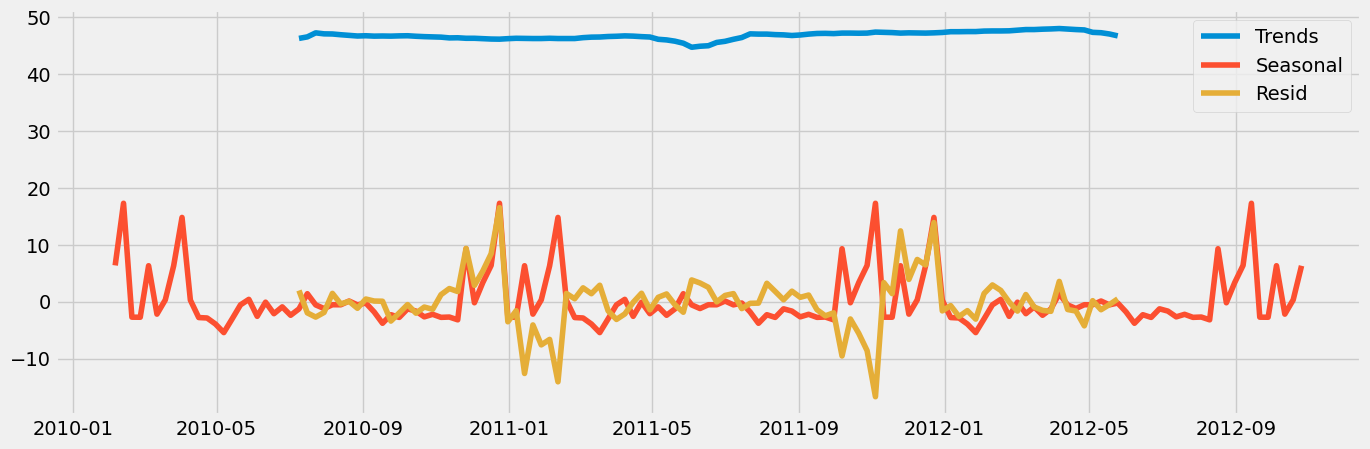

In [20]:
plt.figure(figsize=(15,5))
plt.grid('darkgrid')
plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
plt.legend(['Trends','Seasonal', 'Resid'], loc = 'upper right')
plt.show()

* It shows a Sideway Trend

**Evaluation based on Stores**
 
 lets explore the pattern in store for weekly sales data

In [21]:
print(df_feature.columns)
print(df_sale.columns)


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [22]:
data_store = df_feature.groupby('Store').agg({'Temperature': 'mean', 'Fuel_Price': 'mean', 'IsHoliday': 'sum'})

temp_store = df_sale.groupby('Store').agg({'Weekly_Sales': 'sum'})
temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)

data_store.set_index(np.arange(0,45), inplace=True)
df_store['Temp'] = data_store.Temperature
df_store['Fuel_Price'] = data_store.Fuel_Price
df_store['Holiday'] = data_store.IsHoliday
df_store['Week_Sales'] = temp_store.Weekly_Sales

In [23]:
df_store.describe()

,Store,Size,Temp,Fuel_Price,Holiday,Week_Sales
count,45.000000,45.000000,45.000000,45.000000,45.0,44.000000
mean,23.000000,130287.600000,59.356198,3.405992,13.0,150.090909
std,13.133926,63825.271991,9.956122,0.153935,0.0,78.780478
min,1.000000,34875.000000,37.921264,3.245945,13.0,37.000000
25%,12.000000,70713.000000,51.866319,3.259242,13.0,78.500000
50%,23.000000,126512.000000,58.107912,3.328764,13.0,140.500000
75%,34.000000,202307.000000,68.504670,3.497874,13.0,200.750000
max,45.000000,219622.000000,75.438077,3.643654,13.0,301.000000


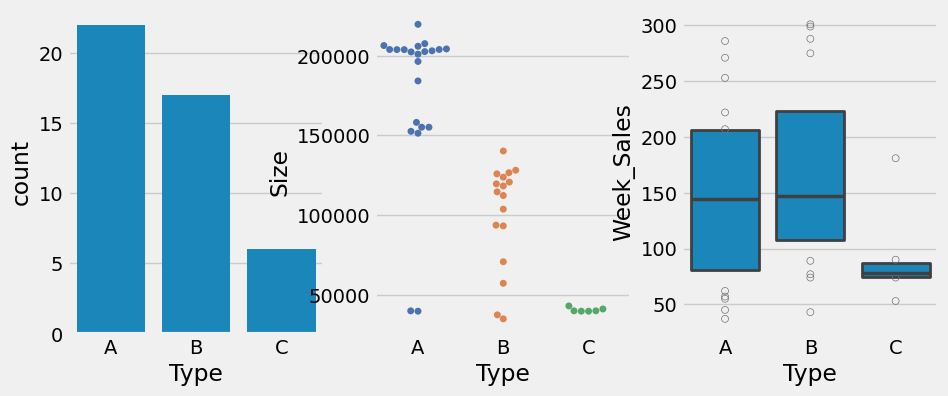

In [24]:
fig,ax = plt.subplots(1,3,figsize=(10, 4))
count = sns.countplot(x=df_store.Type, ax=ax[0])
swarm = sns.swarmplot(data=df_store, y='Size', x='Type', ax=ax[1],  palette="deep")
box = sns.boxenplot(data=df_store, y= 'Week_Sales', x='Type', ax=ax[2])

In Summary 

* A has the highest store count, followed by B, and C has the least.
* In terms of size, A accommodates the most items, followed by B, and C has the least.
* Surprisingly, despite fewer stores and a smaller size, B achieves the highest weekly sales compared to A and C

**Assessment based on Departments**

*A Little bit Invesigation on Department*

In [25]:
df_sale.sample()

,Store,Dept,Date,Weekly_Sales,IsHoliday
252549,26,44,2011-12-09,6278.66,False


In [26]:
len(df_sale['Dept'].unique())

81

In [27]:
data_dept = df_sale.groupby('Dept').agg({'Weekly_Sales': 'sum'})
data_dept.Weekly_Sales = data_dept.Weekly_Sales/10000
data_dept.Weekly_Sales = data_dept.Weekly_Sales.apply(int)
data_dept.sort_values(by='Weekly_Sales')

,Weekly_Sales
Dept,
39,0
78,0
43,0
47,0
51,3
...,...
90,29106
72,30572
38,39311


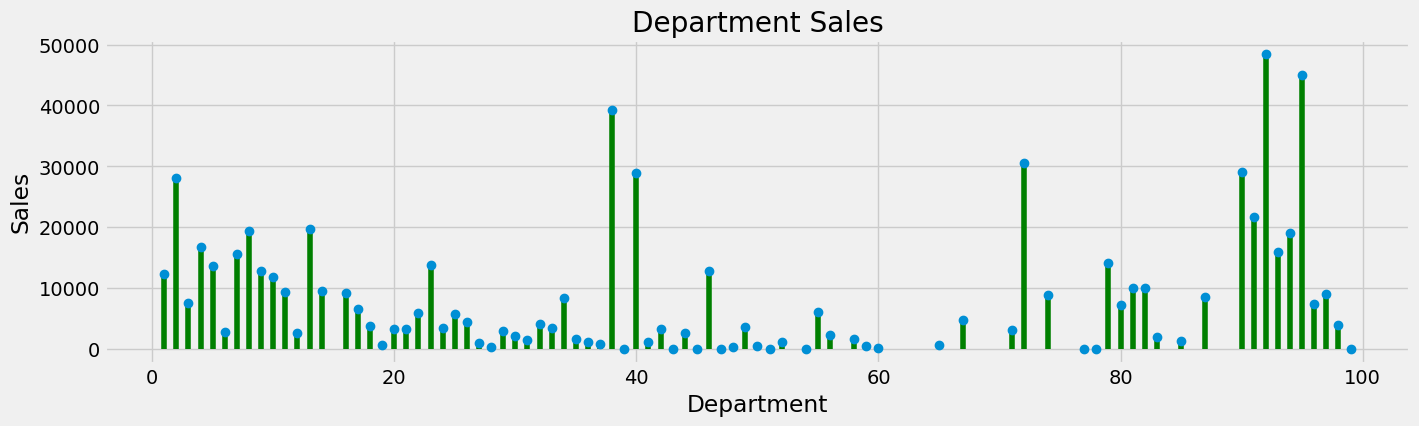

In [28]:
fig1, ax1 = plt.subplots(figsize=(15,4))
plt.vlines(x=data_dept.index, ymin=0, ymax=data_dept['Weekly_Sales'], color='green')
plt.plot(data_dept.index, data_dept['Weekly_Sales'], 'o')
plt.title('Department Sales')
plt.xlabel('Department')
plt.ylabel('Sales')
plt.show()


In summary 

* Departments 1-15 and 90-95 demonstrate higher weekly sales.
* Additionally, departments 38, 40, and 72 exhibit higher weekly sales.

**Examination of Store Types and Year/Month Breakdown**

In [29]:
print(df_sale.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [30]:
sales_data_store = df_sale.groupby(['Date','Store']).agg({'Weekly_Sales': 'sum'})
sales_data_store.sort_index(inplace=True)
sales_data_store.Weekly_Sales = sales_data_store.Weekly_Sales/10000
sales_data_store.Weekly_Sales = sales_data_store.Weekly_Sales.apply(int)
data_table = pd.merge(df_feature,sales_data_store, how='left', on = ['Date','Store'])
data_table = pd.merge(data_table, df_store[['Store','Type']], how='left', on=['Store'])
data_table.head(20)
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]

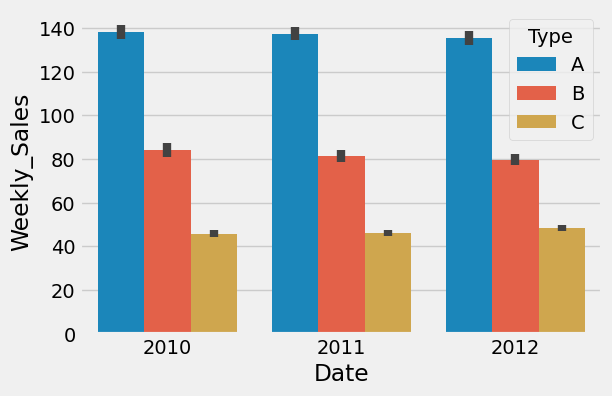

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(x=data_train.Date.dt.year, y=data_train.Weekly_Sales, hue=data_train.Type)
plt.show()

In summary 

* Store Types A and B experienced a minor decrease in sales on a yearly basis.
* Conversely, Store Type C saw a slight increase in sales over the years.

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

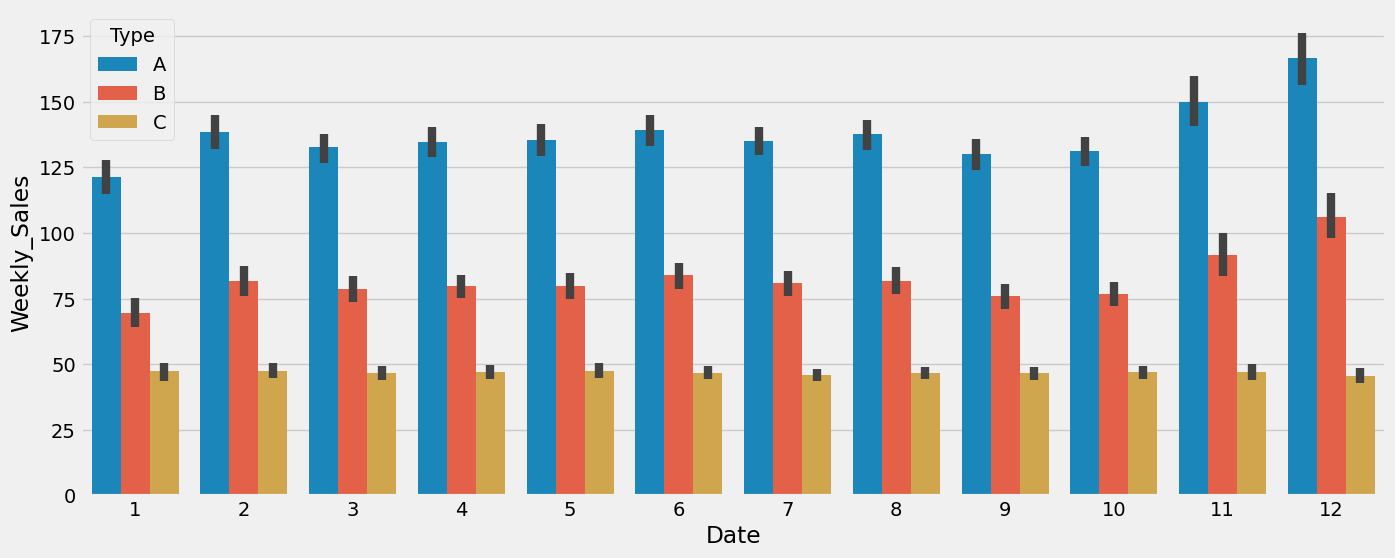

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(x=data_train.Date.dt.month, y= data_train.Weekly_Sales, hue=data_train.Type)


In summary 

* Store Types A and B exhibit sales spikes in November and December, primarily due to holiday seasons, followed by a decline in January.
* On the other hand, Store Type C maintains consistent sales across all months with minimal fluctuations

**Study of Markdowns**

In [33]:
data_table.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Weekly_Sales', 'Type'],
      dtype='object')

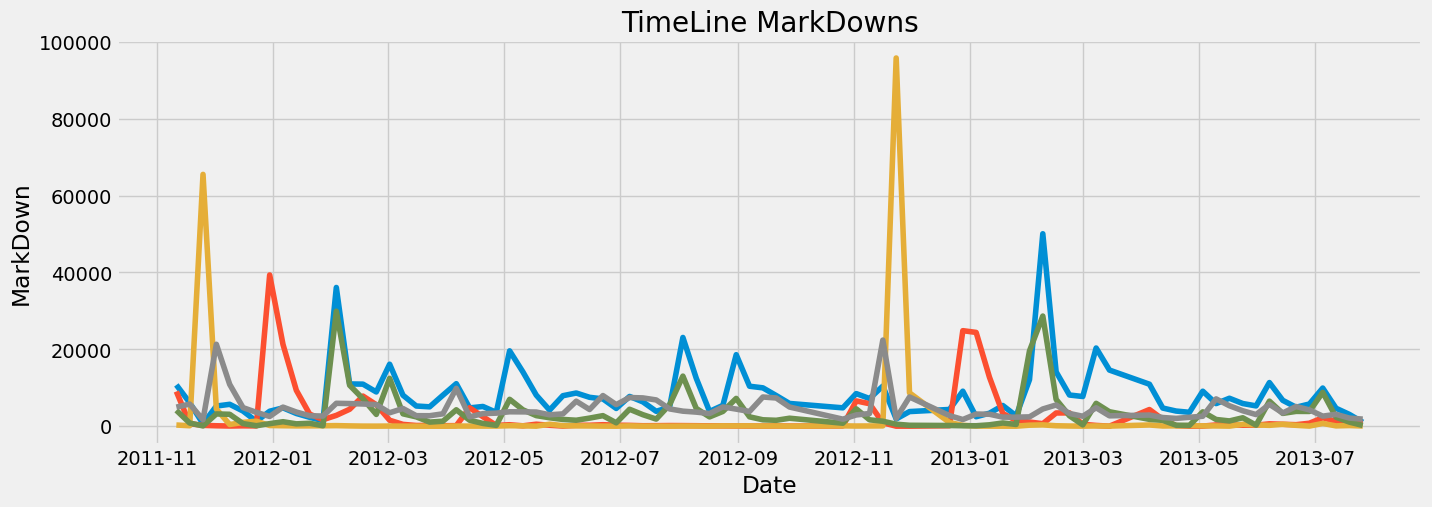

In [34]:
plt.figure(figsize=(15,5))
train_markdown = data_table[data_table.MarkDown2.notnull()]
train_markdown = train_markdown.groupby('Date').agg({'MarkDown1': 'mean', 'MarkDown2': 'mean','MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})

plt.plot(train_markdown.index,train_markdown.MarkDown1)
plt.plot(train_markdown.index, train_markdown.MarkDown2)
plt.plot(train_markdown.index, train_markdown.MarkDown3)
plt.plot(train_markdown.index, train_markdown.MarkDown4)
plt.plot(train_markdown.index, train_markdown.MarkDown5)
plt.title('TimeLine MarkDowns')
plt.ylabel('MarkDown')
plt.xlabel('Date')
plt.show()

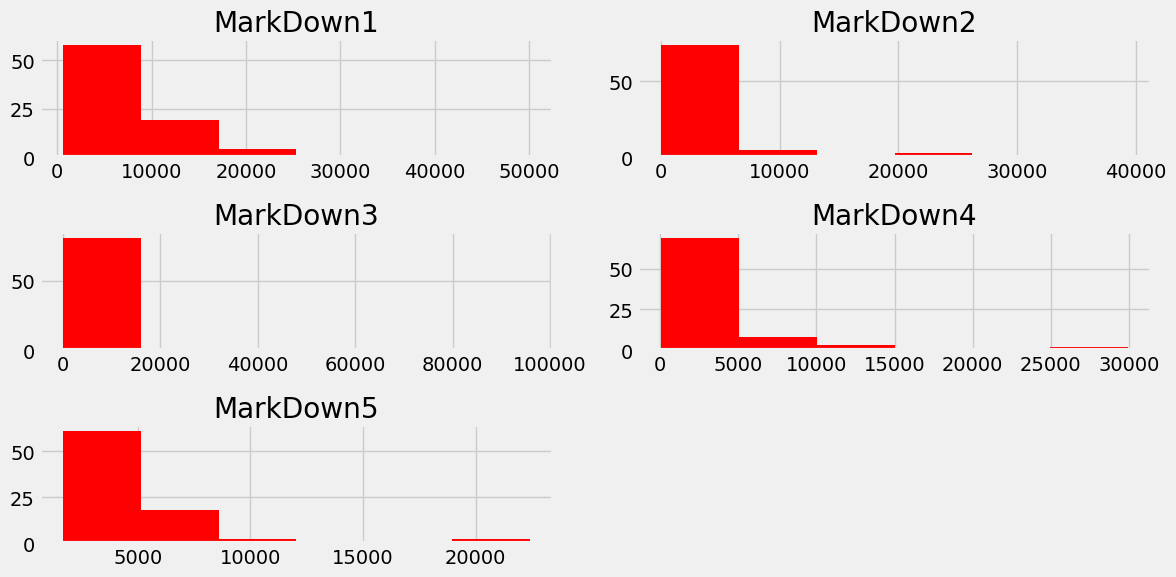

In [35]:
train_markdown.hist(figsize=(12,6), bins=6, color='r')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'MarkDown')

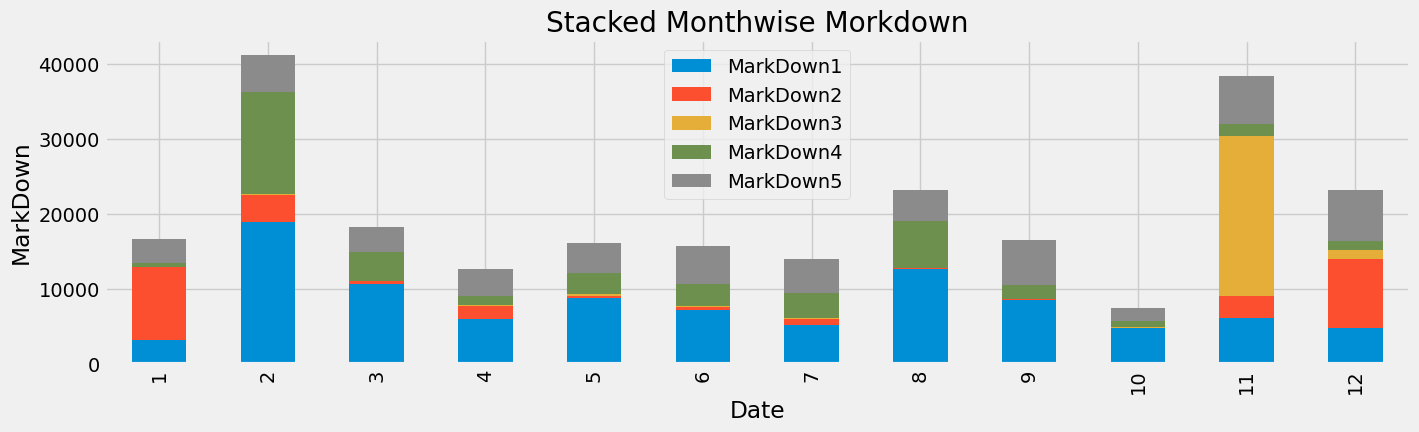

In [36]:
train_markdown_month = train_markdown.groupby(train_markdown.index.month).agg({'MarkDown1': 'mean','MarkDown2': 'mean','MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
train_markdown_month.plot(kind='bar', stacked=True, figsize=(15,4))
plt.title('Stacked Monthwise Morkdown')
plt.ylabel('MarkDown')

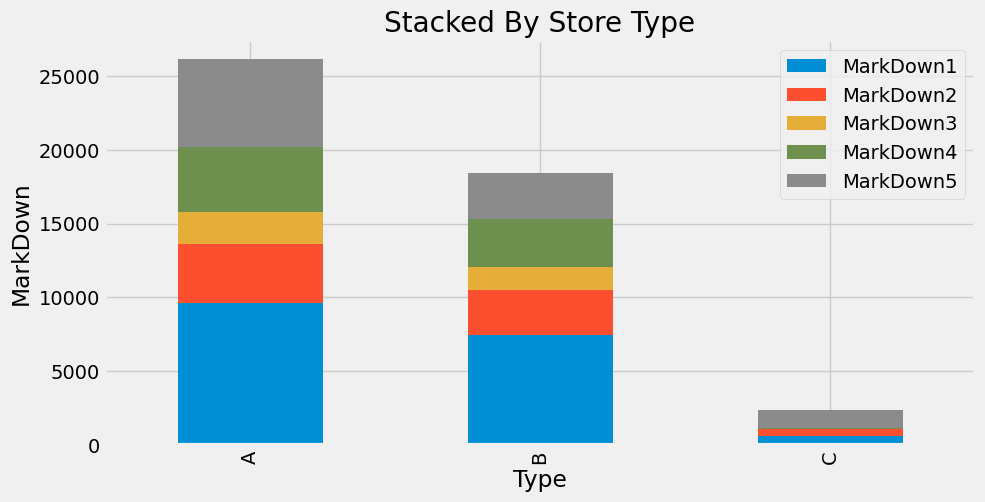

In [37]:
train_markdown_1 = data_table[data_table.MarkDown2.notnull()]
train_markdown_type = train_markdown_1.groupby('Type').agg({'MarkDown1':'mean', 'MarkDown2':'mean', 'MarkDown3':'mean','MarkDown4':'mean', 'MarkDown5':'mean'})
train_markdown_type.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Stacked By Store Type')
plt.ylabel('MarkDown')
plt.show()

*Sales Trends by Time:*
* Weekly sales surge by approximately 20% during November and December due to holiday promotions. Sales decline by approximately 15% in January post-holiday season.

*Store Characteristics and Sales:*
* Store Types A and B experience a slight yearly sales decrease of around 5% despite higher store counts. Store Type C maintains consistent sales and shows a slight yearly increase of about 3% in sales.

*Department-wise Sales Analysis:*
* Certain departments (1-15, 38, 40, 72, and 90-95) demonstrate notably higher weekly sales, with an average increase of 25%.

**In conclusion, understanding the dynamics of sales patterns, store types, and departmental performance is essential for effective business strategies. The data provides valuable insights for optimizing sales approaches, managing inventory, and tailoring marketing efforts to maximize revenue and enhance customer satisfaction.**